# Step 4: Analysis and Visualization

This notebook analyzes the performance of the trained Random Forest model on the synthetic dataset and visualizes key results.

## Objectives:
- Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix to understand classification performance.
- Analyze feature importance to identify the most influential features in classification.
- Generate ROC curves for each class to evaluate performance across all classes.


In [2]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the Trained Model and Data

The Random Forest model trained on the synthetic dataset is loaded along with the processed data. 
For evaluation, the dataset is split into training and testing sets (70:30 split).


In [11]:
# Load the trained model
model = joblib.load("../models/random_forest.pkl")

In [17]:
# Load the processed synthetic dataset
processed_data = pd.read_csv("../data/processed/synthetic_fliper_data.csv")

# Split into features and labels
X = processed_data[["Teff", "logg", "Lum", "FliPer"]]  # Features
y = processed_data["Star_Type"]  # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Confusion Matrix

The confusion matrix provides insights into the model's performance by showing the number of correct and incorrect predictions for each class.

### Plot:
The confusion matrix is visualized below:


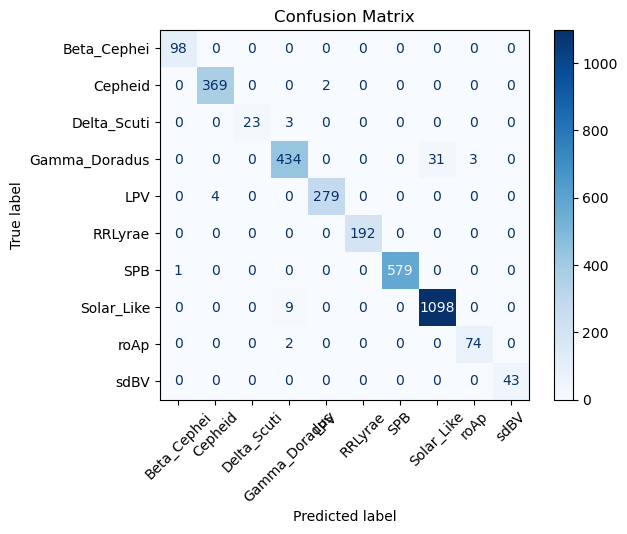

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## Feature Importance

Feature importance indicates how much each feature contributes to the classification task. 
The higher the importance, the more influential the feature is.

### Plot:
The feature importance plot is shown below:


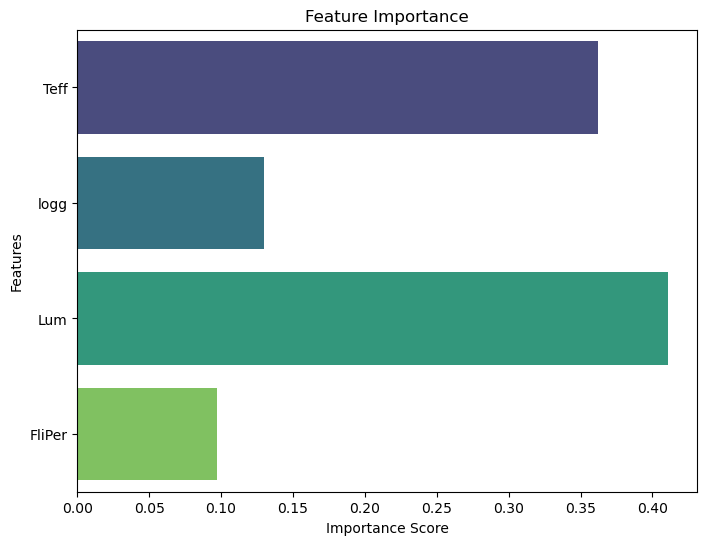

In [19]:
# Extract feature importance from the model
feature_importances = model.feature_importances_
features = X_test.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## Classification Report

The classification report provides detailed metrics for the model's performance, including:
- **Precision**: Proportion of true positive predictions for each class.
- **Recall**: Ability of the model to find all the relevant samples.
- **F1-score**: Harmonic mean of precision and recall.
- **Support**: Number of true instances for each class.

Below is the detailed classification report:


In [20]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

  Beta_Cephei       0.99      1.00      0.99        98
      Cepheid       0.99      0.99      0.99       371
  Delta_Scuti       1.00      0.88      0.94        26
Gamma_Doradus       0.97      0.93      0.95       468
          LPV       0.99      0.99      0.99       283
      RRLyrae       1.00      1.00      1.00       192
          SPB       1.00      1.00      1.00       580
   Solar_Like       0.97      0.99      0.98      1107
         roAp       0.96      0.97      0.97        76
         sdBV       1.00      1.00      1.00        43

     accuracy                           0.98      3244
    macro avg       0.99      0.98      0.98      3244
 weighted avg       0.98      0.98      0.98      3244



## ROC Curves

ROC (Receiver Operating Characteristic) curves visualize the trade-off between the true positive rate (sensitivity) and false positive rate for each class. 
The AUC (Area Under Curve) score provides a single metric to evaluate overall performance.

### Plot:
The ROC curves for all classes are shown below:


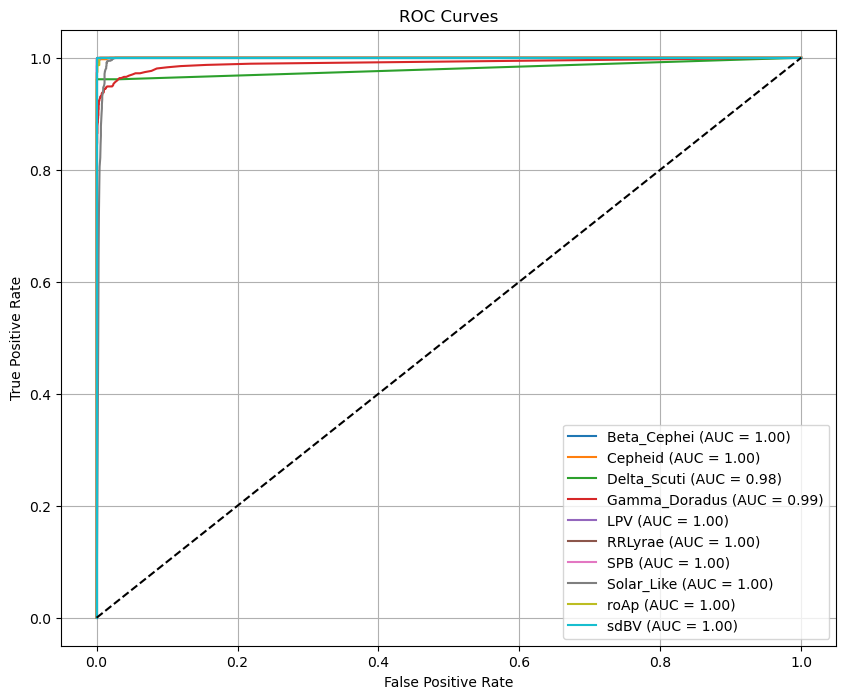

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random chance
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Conclusions

The trained Random Forest model demonstrates strong performance in classifying star types in the synthetic dataset. 
Key observations:
- High accuracy across all classes as seen in the classification report.
- High accuracy likely due to a simple dataset

### Next Steps:
- Training and then testing the model on better simulated data
- Testing the trained model on real data
